In [1]:
import pandas as pd
from time import sleep
from random import shuffle

In [53]:
import insta as IG
insta = IG.Instagram()
insta.login()

In [54]:
insta.get_follow('followers')

.................................................................................

In [68]:
insta.get_follow('following')

............................

In [69]:
insta.get_photos()

In [2]:
follower = pd.read_pickle('followers.pickle')
follower.shape

(1375, 6)

In [3]:
following = pd.read_pickle('following.pickle')
following.shape

(1655, 6)

In [4]:
following = following.sort_values('time_first')
following_not_follower = [x for x in following[following['time_last'] == max(following['time_last'])]['username'].values if x  not in follower['username'].values ]
print(len(following_not_follower),following_not_follower)

3 ['tiagu.costa', 'anne.mayara', 'janaina.js150']


In [5]:
follower_not_following = [x for x in follower[follower['status'] != 'Solicitado']['username'].values if x  not in following['username'].values ]
print(len(follower_not_following),follower_not_following)

915 ['fotodobrasil_marcelovianna', 'hiphopmusicccf_28', 'mexbeton', 'official_sashadin', 'infoeducausm', 'new.top.tech', 'investorjohndickson', 'kickscooterlive', 'ai_art_supreme', 'alphakit.ir', 'ccbots_eng', 'psicologarosanedemirandamuniz', 'junioradal97', 'fatornerdoficial', 'ix_donatus', 'camila_albiero', 'arduino_diy_all', 'zoyakostyuk', 'instructoresasociados', 'resistthesurge', 'destinos___imperdiveis', 'dev.up', 'braian5614', 'data_science_central', 'olivia.goodwill.fx', 'lascala_integrated_media', 'pratiquearomaterapia', 'fernandalewit', 'bolao_tricolor', 'plasticalchemy', 'maddybrowniie', 'becintech', 'vixenhammish', 'meumantoficial01', 'kromoscentro', 'paulorobertojr.fisioterapeuta', 'techpixid', 'gb.coach', 'olharnerdstore', 'sophieellisonk191', 'taekwondo.academy.slovakia', 'maxpronko', 'iptv_cinehd', 'cad_kw', '3d_option_', 'psicoavila', 'bottrader.world', 'giuseppesantoro1470', 'a19vm', 'kcstore17', 'fotografandopelorio', 'bemestarreeducacao', 'laisway', 'lifesgreatirl',

In [6]:
follower.groupby('status').count()

,time_first,time_last,username,name,img
status,,,,,
Seguindo,393,393,393,393,393
Seguir,962,962,962,962,962
Solicitado,20,20,20,20,20


In [7]:
follower[follower['status'] == 'Solicitado']

,time_first,time_last,username,name,status,img
30,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,judiamantaras,Juliana Diamantaras,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/c2...
81,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,janemeger,Janete Meger Crestana,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
186,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,gabdorn,Gabriel Dornbach,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
191,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,jose_wagner,José Wagner Sanches,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/fa...
220,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,paola.gaggini,Paola Gaggini,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6f...
226,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,christina.penna,Christina Penna,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/20...
260,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,rogertaipina,Roger Taipina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/43...
265,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,marcellaincerti,Marcella Incerti,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/19...
270,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,consultoria.medina,Bernardo Medina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/03...
291,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,debylamszt,Débora Lam,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...


In [8]:
follower.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
1374,2019-09-28 10:29:14.078934,2019-09-28 11:17:51.332598,turkcell.iletisimm,Turk İletişim,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5c1...
1373,2019-09-28 10:29:14.078934,2019-09-28 11:17:51.332598,nyck_to,Nycollas Fernandes,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/345...
1372,2019-09-28 10:29:14.078934,2019-09-28 11:17:51.332598,johnny_bedo,Johnny Bedo,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/c05...
1371,2019-09-28 10:29:14.078934,2019-09-28 11:17:51.332598,estado_vital,Estado_vital,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/679...
1370,2019-09-28 10:29:14.078934,2019-09-28 11:17:51.332598,nailsahar.72,کاشت ناخن همدان📍,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a00...
1369,2019-09-28 10:29:14.078934,2019-09-28 11:17:51.332598,mr.wolf2862_00,MR.WOLF,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ca4...
1368,2019-09-28 10:29:14.078934,2019-09-28 11:17:51.332598,valentinosolinas,Valentino Solinas,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a1c...
1363,2019-09-26 16:50:36.578741,2019-09-28 11:17:51.332598,_jaderbarbosa,Jader Barbosa,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/0d7...
1359,2019-09-26 16:50:36.578741,2019-09-28 11:17:51.332598,quintalverde.consultoria,Quintal Verde Consultoria,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/27b...
1360,2019-09-26 16:50:36.578741,2019-09-28 11:17:51.332598,escola_do_direito,𝐋𝐞𝐚𝐧𝐝𝐫𝐨𝐠𝐨𝐦𝐞𝐬𝐩𝐫𝐨𝐟,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/aba...


In [9]:
follower[follower['time_last'] < max(follower['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
13,2019-07-29 22:30:54.216241,2019-07-29 22:30:54.216241,kickscooterlive,🛴 KickScooterLive Official,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c7...
85,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,cuidandodosono,Drª Danuska - Psi e Sono 😴💤,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/48...
94,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,gargamelhumorista,Gargamel Humorista,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
450,2019-07-30 08:41:23.735903,2019-07-31 21:25:50.080325,mbaliles,Mr Baliles,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/0e...
181,2019-07-29 22:30:54.216241,2019-07-31 21:25:50.080325,ah_investment,AH investment,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/40...
451,2019-07-30 10:13:53.849995,2019-07-31 21:25:50.080325,mortenohle,Morten Ohle,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
9,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,new.top.tech,N.T.T,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/07...
67,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,psicoavila,Psi. Richard Avila,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/35...
474,2019-08-01 10:43:26.593775,2019-08-02 10:37:08.772824,adhy_inv,ADHY Investment,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/85d...
16,2019-07-29 22:30:54.216241,2019-08-02 16:15:06.808376,ccbots_eng,CCBots Engenharia,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/29...


In [10]:
following.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
1654,2019-09-26 16:53:50.726929,2019-09-26 16:53:50.726929,janaina.js150,Janaina,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/8de...
1653,2019-09-26 16:53:50.726929,2019-09-26 16:53:50.726929,anne.mayara,Anne Mayara Rodrigues,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/844...
1652,2019-09-25 23:01:07.644784,2019-09-25 23:01:07.644784,zeeeu_silvacolombiano,Ellizeu Costa Silva,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/0c7...
1651,2019-09-25 23:01:07.644784,2019-09-25 23:01:07.644784,sista_roots19,E M M Y L L Y R O O T S🍁,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/fca...
1650,2019-09-25 23:01:07.644784,2019-09-25 23:01:07.644784,jianatam,Jiana Tamanho,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e80...
1649,2019-09-25 23:01:07.644784,2019-09-25 23:01:07.644784,nildolouredoempreendedor,Nildo Louredo,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/835...
1648,2019-09-25 23:01:07.644784,2019-09-25 23:01:07.644784,brs.amanda,Amanda,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ef6...
1647,2019-09-25 23:01:07.644784,2019-09-25 23:01:07.644784,lineia__li,LINEIA SILVA,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/4c9...
1646,2019-09-25 23:01:07.644784,2019-09-26 16:53:50.726929,rdias29,Ricardo Dias,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/edc...
1645,2019-09-25 23:01:07.644784,2019-09-25 23:01:07.644784,danielaoliveira9538,Dani Oliveira,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/372...


In [11]:
following[following['time_last'] < max(following['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
578,2019-08-03 16:31:25.281430,2019-08-04 17:50:28.684857,globoesportecom,GloboEsporte.com,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3d2...
590,2019-08-04 22:13:41.081369,2019-08-04 22:13:41.081369,bemartins.ml,Bernardo Martins,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6b9...
431,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,araujodiogoo,Diogo Araujo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/80...
640,2019-08-05 09:20:11.058195,2019-08-05 12:05:56.763061,micheldatilo,Michel Datilo,Seguindo,https://scontent-gig2-1.cdninstagram.com/vp/40...
612,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,adrianafinamori,Adriana Finamori Cardoso,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/991...
608,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,renatacartagenes,Renata Cartagenes Ferreira,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e33...
622,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,francys_mara,Francys Mara Maciel,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/c5d...
609,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,simone_menezes5,Simone,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ec2...
630,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,thalitailva,Thalita Silva,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/c15...


In [12]:
following[following['time_last'] == max(following['time_last'])].sort_values('time_first')

,time_first,time_last,username,name,status,img
363,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,fredbpego,Fred,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/9e...
417,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,luvitgallery,LuViT🦋Gallery,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
266,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,di3ghit0,Diego Altieri,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/2e...
96,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,nicolastorrini,Nic Tor,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/cd...
91,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,nanda.alvarenga,Fernanda,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/eb...
88,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,rozinhamoss,Rô Moss,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/a7...
87,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,mgvollmer,Marcus Vollmer,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/67...
86,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,ale.lewit,Alessandra,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/22...
85,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,yunafontoura,yunafontoura,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/0d...
77,2019-07-30 10:29:44.220296,2019-09-26 16:53:50.726929,patrick2mil,Patrick Gil,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/d6...


In [13]:

people = follower.append(following, ignore_index=True)
people.drop_duplicates('username',inplace=True)

In [14]:

people.sort_values('username')

,time_first,time_last,username,name,status,img
1252,2019-09-09 20:43:28.297534,2019-09-28 11:17:51.332598,0g.bernardo11,Gabriel Ferreira,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/24b...
1745,2019-07-30 10:29:44.220296,2019-08-06 16:21:23.181522,13allan,Allan Araújo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
860,2019-08-19 21:23:40.354401,2019-09-28 11:17:51.332598,19ray87,Rai Santos,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b12...
1868,2019-07-30 10:29:44.220296,2019-08-15 01:07:12.837244,21lucasbastos,Lucas Bastos,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
1041,2019-08-27 18:04:51.915632,2019-09-28 11:17:51.332598,2b_comfy_wear,2B Comfy Wear,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/cce...
449,2019-07-29 23:50:37.874241,2019-08-09 08:32:17.126650,2t.importados,TT Imports,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e1...
65,2019-07-29 22:30:54.216241,2019-09-28 11:17:51.332598,3d_option_,3D печать,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/21...
533,2019-08-04 17:25:00.382049,2019-09-28 11:17:51.332598,3dprintalimsatim,3dhayallerinedokun,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/30e...
580,2019-08-06 18:13:11.314843,2019-09-28 11:17:51.332598,85millysantos,Jamilly Santos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/9e1...
620,2019-08-07 19:51:20.508949,2019-08-31 09:05:52.593649,______lor.rabbit,lor rabbit,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1be...


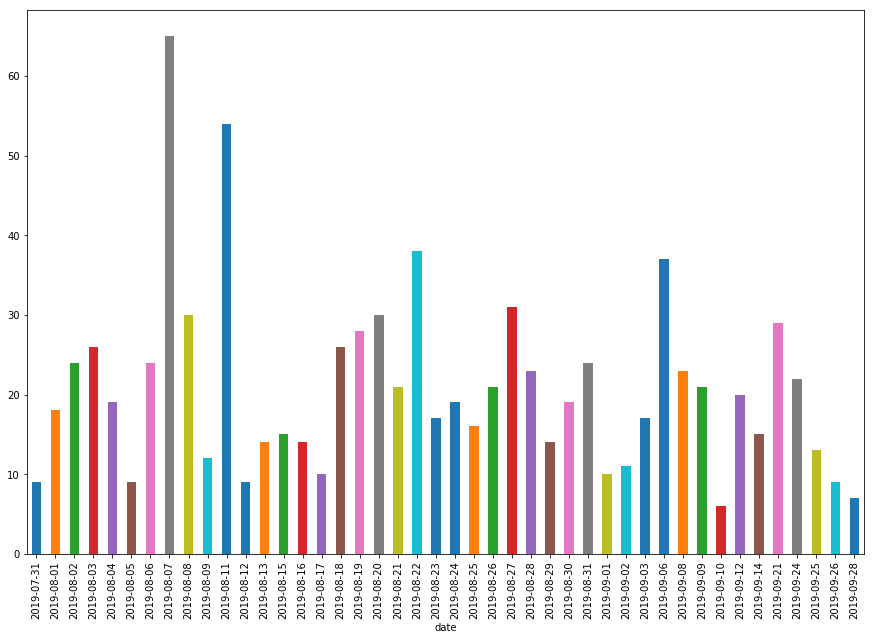

In [28]:
follower['date'] = follower['time_first'].dt.date
follower.groupby('date')['username'].count()[2:].plot(kind='bar', figsize=(15,10))

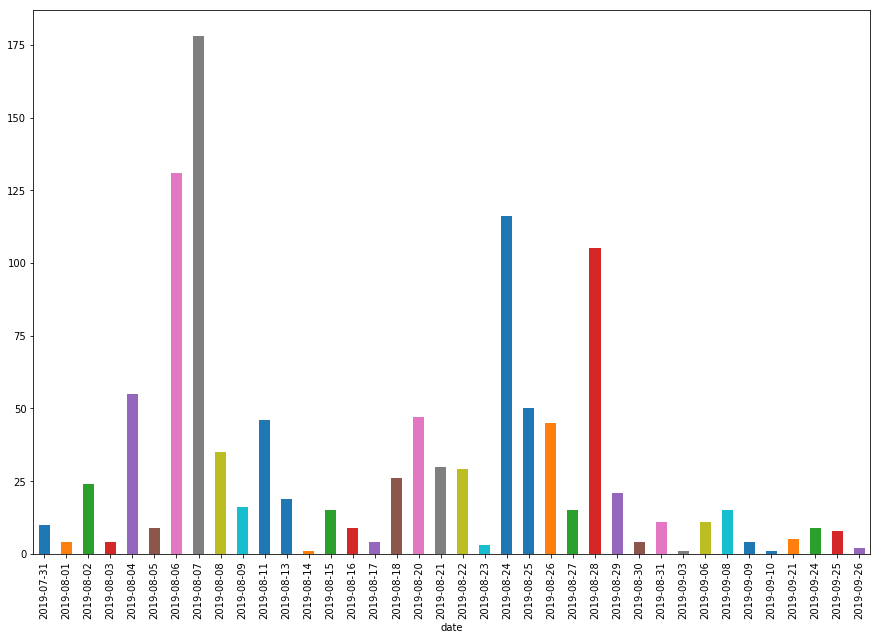

In [29]:
following['date'] = following['time_first'].dt.date
following.groupby('date')['username'].count()[1:].plot(kind='bar', figsize=(15,10))

In [18]:
#shuffle(following_not_follower)
len(following_not_follower),following_not_follower


(3, ['tiagu.costa', 'anne.mayara', 'janaina.js150'])

In [74]:
for user in following_not_follower[:65]:
    try:
        insta.unfollow_user(user)
        sleep(10)
    except:
        print('unfollow error ',user)

erro get_numbers Message: Unable to locate element: /html/body/span/section/main/div/header/section/ul/li[1]/*/span

unfollow error  gabisbatista7
erro get_numbers Message: Unable to locate element: /html/body/span/section/main/div/header/section/ul/li[1]/*/span

unfollow error  chirley8
erro get_numbers Message: Unable to locate element: /html/body/span/section/main/div/header/section/ul/li[1]/*/span

unfollow error  d_h_19
erro get_numbers Message: Unable to locate element: /html/body/span/section/main/div/header/section/ul/li[1]/*/span

unfollow error  joaolourencogc
erro get_numbers Message: Unable to locate element: /html/body/span/section/main/div/header/section/ul/li[1]/*/span

unfollow error  renansbr
erro get_numbers Message: Unable to locate element: /html/body/span/section/main/div/header/section/ul/li[1]/*/span

unfollow error  dicoloreparaiso
erro get_numbers Message: Unable to locate element: /html/body/span/section/main/div/header/section/ul/li[1]/*/span

unfollow error 

In [23]:
following_vini = pd.read_pickle('following/assisvinicius.pickle')
follower_vini = pd.read_pickle('followers/assisvinicius.pickle')
following_vini.shape, follower_vini.shape

((371, 6), (1642, 6))

In [24]:
following_vini = following_vini.sort_values('time_first')
following_not_follower_vini = [x for x in following_vini[following_vini['time_last'] == max(following_vini['time_last'])]['username'].values if x  not in follower_vini['username'].values ]
print(len(following_not_follower_vini),following_not_follower_vini)

50 ['edmonteirocardozo', 'franciscus', 'erick_bretas', 'leilasterenberg', 'regmartelli', 'fernandosastre', 'andrelamin', 'elianacalmonoficial', 'mulheres50mais', 'fgraell', 'bzaganelli', 'profissao_viajante', 'gabrielfranco3030', 'biancarothier', 'jmarianobonidemathis', 'kladuccini', 'agencia_lupa', '60secdocs', 'globonews', 'ocatequistaoficial', 'keyesartmile', 'natasha_pillay_', 'opensecrets_za', 'embassyofbrazil_insouthafrica', 'showdavida', 'dw.brasil', 'jonalpeyrie', 'claudiaturela', 'gourmetgrubb', 'rosana.dossantos.14', 'greengodictionary', 'letsweletsemotshidiemang', 'rfi_br', 'dr_modi_skin_lightening_clinic', 'cnnafrica', 'aboutsouthafrica', 'ijnet', 'documinute', 'abcgovbr', 'itamaratygovbr', 'andre_trigueiro', 'abraji_', 'leandro_stoliar', 'mart1nphoto', 'ideiadepitico', 'feliperedefritz', 'portalespmrj', 'coutinho1082', 'brasil_em_maputo', 'alexandreroldao']
